# FB Prophet-Final Model

In [1]:
import pandas as pd
import numpy as np
import holidays
from fbprophet import Prophet
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)


# Model 1 using  x.test as measure with extra graphs 

In [2]:
train= pd.read_csv('2018-2020j_prophet.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  560 non-null    int64 
 1   Date        560 non-null    object
 2   Total       560 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
train['Date'] = pd.to_datetime(train['Date'])

In [5]:
train.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
train.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)
df = train

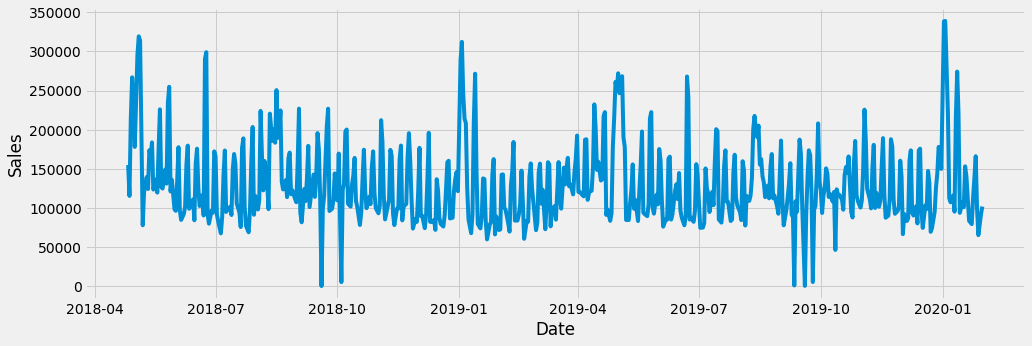

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df['ds'], df['y'], linestyle='-', label='All data')
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

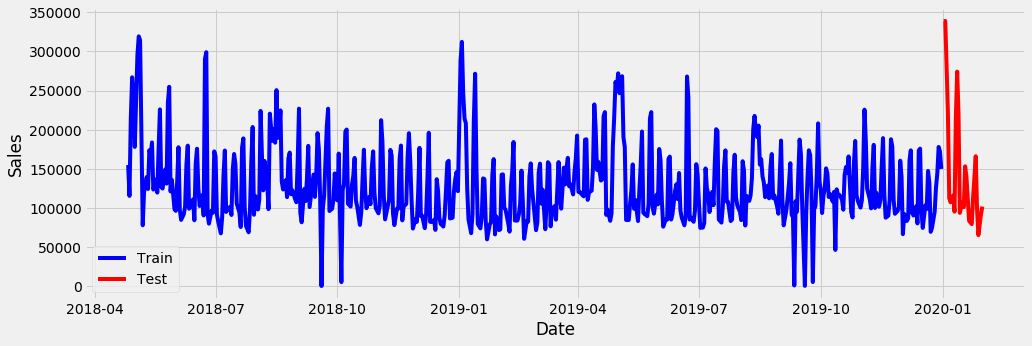

In [8]:
n_test = 26
df_train = df[:-n_test]
df_test = df[-n_test:]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_train['ds'], df_train['y'], linestyle='-', color='blue', label='Train')
ax.plot(df_test['ds'],df_test['y'],linestyle='-', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [9]:
events = pd.DataFrame({
    'holiday': 'event',
    'ds': pd.to_datetime(['2018-04-28', '2018-04-29', '2018-04-30', 
                          '2018-05-03', '2018-05-04', '2018-05-05',
                          '2018-05-20', '2018-05-26', '2018-05-27',
                          '2018-06-23', '2018-06-24', '2018-07-29',
                          '2018-08-04', '2018-08-11', '2018-08-12', 
                          '2018-08-14', '2018-08-16', '2018-08-19',
                          '2018-09-02', '2018-09-23', '2018-09-24',
                          '2018-10-08', '2018-11-03', 
                          '2019-01-02', '2019-01-03', '2019-01-04',
                          '2019-01-05', '2019-01-06', '2019-01-12', 
                          '2019-01-13', '2019-04-13', '2019-04-14',
                          '2019-04-20', '2019-04-21', '2019-04-28',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-02', '2019-05-03', '2019-05-04', 
                          '2019-05-25', '2019-05-26', '2019-06-22',
                          '2019-06-23', '2019-07-14', '2019-08-11',
                          '2019-08-12', '2019-08-15', '2019-09-29', 
                          '2019-11-03',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-05', '2020-01-11', '2020-01-12',
                          '2020-01-13', '2020-02-02', '2020-02-14',
                          '2020-02-23']),
    'lower_window':0,
    'upper_window':1,
})
superholidays = pd.DataFrame({
    'holiday': 'superholiday',
    'ds': pd.to_datetime(['2018-04-29', '2018-05-03', '2018-05-04',
                          '2018-05-05', '2018-05-27', '2018-06-23', 
                          '2018-06-24', '2018-08-04',
                          '2019-01-02', '2019-01-03', '2019-01-13',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-03', '2019-05-04', '2019-06-22',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-11']),
    'lower_window':0,
   'upper_window':1,
})
holidays = pd.concat((events, superholidays))


In [10]:
#Hyperparameters
model = Prophet(holidays=holidays, 
            
            yearly_seasonality=True, 
            weekly_seasonality=True, 
            daily_seasonality=False,
            
            seasonality_prior_scale=0.1,
            interval_width=0.95,
            holidays_prior_scale=10,
            changepoint_prior_scale=0.15)
                                    
model.add_country_holidays(country_name='JP')
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
forecast = model.predict(df)
forecast[['ds','yhat']].head()

ds           yhat
0 2018-04-26  123671.457227
1 2018-04-27  127383.692802
2 2018-04-28  225169.117408
3 2018-04-29  298311.897626
4 2018-04-30  259581.744040

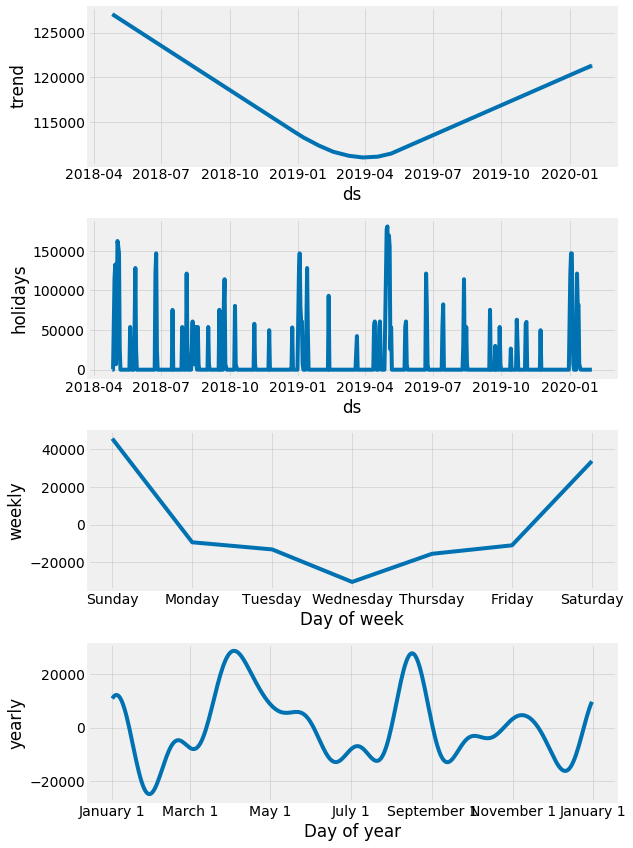

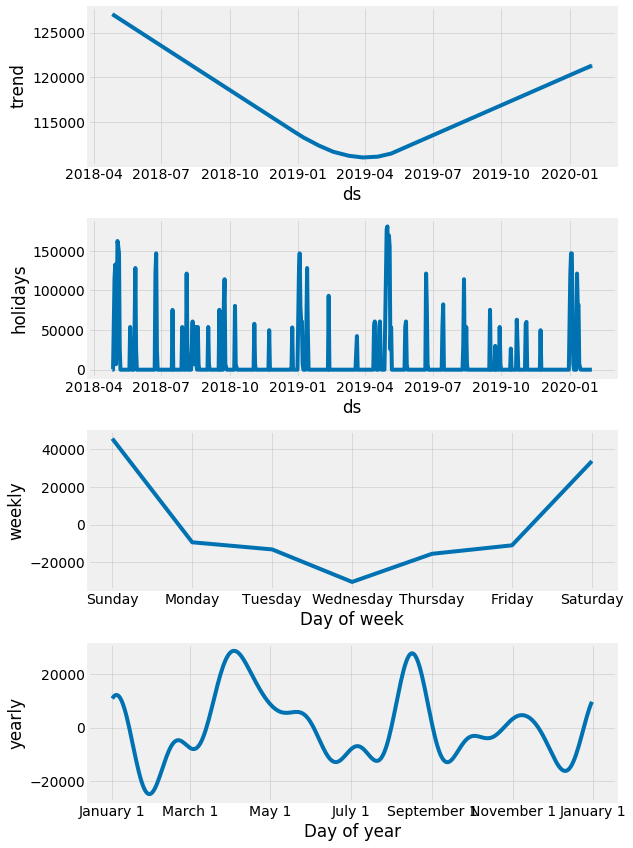

In [12]:
model.plot_components(forecast)

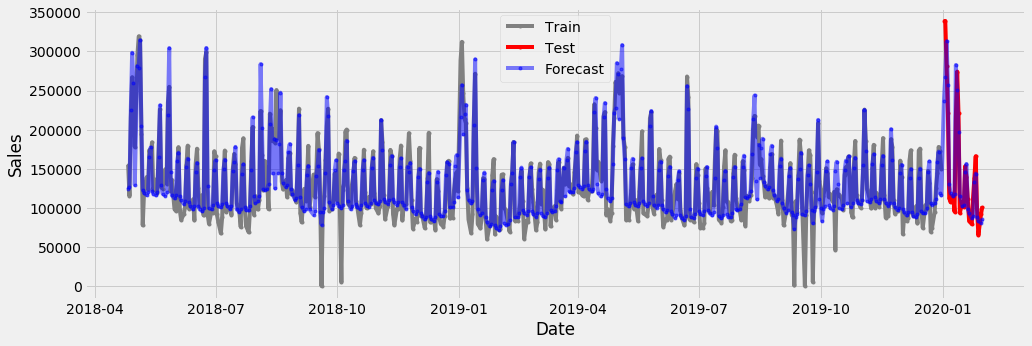

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_train['ds'], df_train['y'], c='grey', marker='o', ms=3, linestyle='-', label='Train')
ax.plot(df_test['ds'], df_test['y'], c='red', marker='o',ms=3, linestyle='-', label='Test')
ax.plot(forecast['ds'], forecast['yhat'], c='blue', marker='o', ms=3, linestyle='-', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

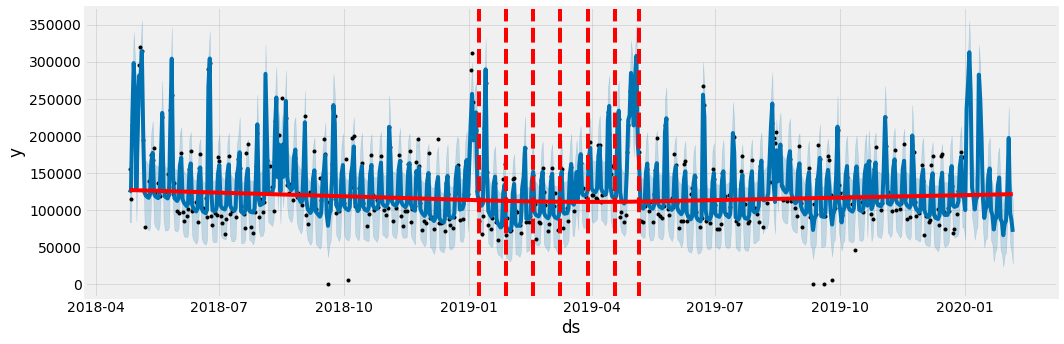

In [57]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast,figsize=(15, 5))
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [58]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(model,forecast)
py.iplot(fig)

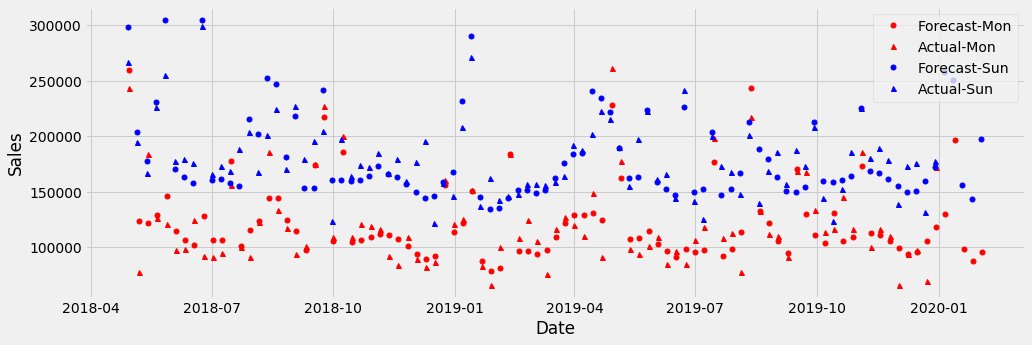

In [59]:
fig, ax = plt.subplots(figsize=(15, 5))
forecast['weekday'] = forecast['ds'].dt.weekday
df['weekday'] = df['ds'].dt.weekday
colors = ['r', 'g', 'yellow', 'pink', 'purple', 'cyan', 'blue']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for wd in [0, 6]:
    fc_wd = forecast[forecast['weekday'] == wd]
    ax.plot(
        fc_wd['ds'], fc_wd['yhat'],
        c=colors[wd], marker='o', ms=5, linestyle='None',
        label=f'Forecast-{weekdays[wd]}')
    df_wd = df[df['weekday'] == wd]
    ax.plot(
        df_wd['ds'], df_wd['y'],
        c=colors[wd], marker='^', ms=5, linestyle='None',
        label=f'Actual-{weekdays[wd]}'
    )
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

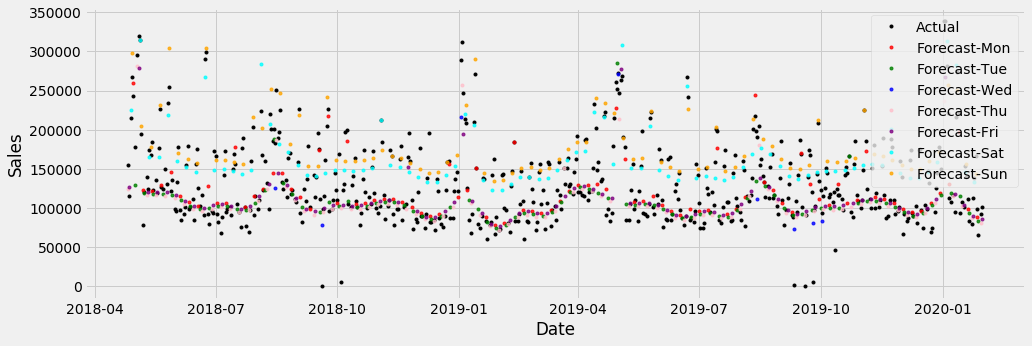

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(
    df['ds'], df['y'],
    c='black', marker='o', ms=3, linestyle='None',
    label=f'Actual'
)

forecast['weekday'] = forecast['ds'].dt.weekday
colors = ['r', 'g', 'blue', 'pink', 'purple', 'cyan', 'orange']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for wd in range(7):
    fc_wd = forecast[forecast['weekday'] == wd]
    ax.plot(
        fc_wd['ds'], fc_wd['yhat'],
        c=colors[wd], marker='o', ms=3, linestyle='None',
        label=f'Forecast-{weekdays[wd]}', alpha=0.8)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [18]:
y_true = df_test['y']
y_forecast = forecast[-n_test:]['yhat']
smape = ((y_true - y_forecast).abs() / (y_true.abs() + y_forecast.abs())).mean() * 200
print('The SMAPE error is:', smape)

The SMAPE error is: 13.949977563003134


### Metrics

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
555 2020-01-26  143981.109363  103363.176780  184245.442472
556 2020-01-27   88157.389667   46545.738229  130199.869884
557 2020-01-28   83779.065726   42047.894425  127661.770226
558 2020-01-30   81057.244792   42000.038768  122743.082645
559 2020-01-31   85752.054581   46144.010633  128452.077543

In [20]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [21]:
metric_df.tail(5)

ds           yhat       y
555 2020-01-26  143981.109363  166096
556 2020-01-27   88157.389667   99064
557 2020-01-28   83779.065726   65286
558 2020-01-30   81057.244792   92291
559 2020-01-31   85752.054581  101845

In [22]:
metric_df.dropna(inplace=True)

In [23]:
metric_df.tail()

ds           yhat       y
555 2020-01-26  143981.109363  166096
556 2020-01-27   88157.389667   99064
557 2020-01-28   83779.065726   65286
558 2020-01-30   81057.244792   92291
559 2020-01-31   85752.054581  101845

In [24]:
r2_score(metric_df.y, metric_df.yhat)

0.8184024240199362

In [25]:
mean_squared_error(metric_df.y, metric_df.yhat)**0.5

22009.469354715897

In [26]:
mean_absolute_error(metric_df.y, metric_df.yhat)

15695.30046482341

In [27]:
def mape(y_true, y_model):
    y_true, y_model=np.array(y_true), np.array(y_model)
    return np.mean(np.abs((y_true-y_model)/y_true))*100

In [28]:
mape(metric_df.y, forecast.yhat)

110.84715313827924

In [29]:
metric_df.loc['2020':,['y','yhat']].corr()

y      yhat
y     1.000000  0.905983
yhat  0.905983  1.000000

In [30]:
#metric_df.to_csv('final.csv')

# Model 1 without  x.text using Prophet

In [31]:
df = pd.read_csv('2018-2019_prophet.csv')

In [32]:
df= df.rename(columns={'Date': 'ds', 'Total': 'y'})

In [33]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
df['ds'] = pd.to_datetime(df['ds'])

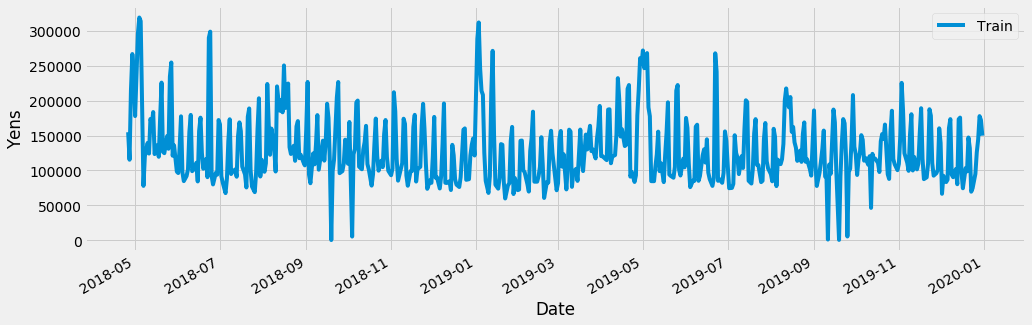

In [35]:
ax = df.set_index('ds').plot(figsize=(15, 5))
plt.legend(['Train'])
ax.set_ylabel('Yens')
ax.set_xlabel('Date')

plt.show()

In [36]:
#Alternative dots graph
#fig, ax = plt.subplots(figsize=(15, 5))
#ax.plot(df['ds'], df['y'], linestyle='None', marker='o')
#ax.set_xlabel('Date')
#ax.set_ylabel('Sales');

In [37]:
events = pd.DataFrame({
    'holiday': 'event',
    'ds': pd.to_datetime(['2018-04-28', '2018-04-29', '2018-04-30', 
                          '2018-05-03', '2018-05-04', '2018-05-05',
                          '2018-05-20', '2018-05-26', '2018-05-27',
                          '2018-06-23', '2018-06-24', '2018-07-29',
                          '2018-08-04', '2018-08-11', '2018-08-12', 
                          '2018-08-14', '2018-08-16', '2018-08-19',
                          '2018-09-02', '2018-09-23', '2018-09-24',
                          '2018-10-08', '2018-11-03', 
                          '2019-01-02', '2019-01-03', '2019-01-04',
                          '2019-01-05', '2019-01-06', '2019-01-12', 
                          '2019-01-13', '2019-04-13', '2019-04-14',
                          '2019-04-20', '2019-04-21', '2019-04-28',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-02', '2019-05-03', '2019-05-04', 
                          '2019-05-25', '2019-05-26', '2019-06-22',
                          '2019-06-23', '2019-07-14', '2019-08-11',
                          '2019-08-12', '2019-08-15', '2019-09-29', 
                          '2019-11-03',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-05', '2020-01-11', '2020-01-12',
                          '2020-01-13', '2020-02-02', '2020-02-14',
                          '2020-02-23']),
    'lower_window':0,
    'upper_window':1,
})
superholidays = pd.DataFrame({
    'holiday': 'superholiday',
    'ds': pd.to_datetime(['2018-04-29', '2018-05-03', '2018-05-04',
                          '2018-05-05', '2018-05-27', '2018-06-23', 
                          '2018-06-24', '2018-08-04',
                          '2019-01-02', '2019-01-03', '2019-01-13',
                          '2019-04-29', '2019-04-30', '2019-05-01',
                          '2019-05-03', '2019-05-04', '2019-06-22',
                          '2020-01-02', '2020-01-03', '2020-01-04',
                          '2020-01-11']),
    'lower_window':0,
   'upper_window':1,
})
holidays = pd.concat((events, superholidays))


In [38]:
# Best result so far FB2-1
# Hyperparameters 
#m = Prophet(holidays=holidays, 
#            yearly_seasonality=True, 
#            weekly_seasonality=True, 
#            daily_seasonality=False, 
#            interval_width=0.95, 
#            seasonality_prior_scale=0.1)
#m.add_country_holidays(country_name='JP')
#m.fit(df)

In [39]:
# Hyperparameters
m = Prophet(holidays=holidays, 
            
            yearly_seasonality=True, 
            weekly_seasonality=True, 
            daily_seasonality=False,
            
            seasonality_prior_scale=0.1,
            interval_width=0.95,
            holidays_prior_scale=10,
            changepoint_prior_scale=0.15)
                                    
m.add_country_holidays(country_name='JP')
m.fit(df)

In [40]:
future = m.make_future_dataframe(periods = 36)
future.tail()

ds
565 2020-02-01
566 2020-02-02
567 2020-02-03
568 2020-02-04
569 2020-02-05

In [41]:
#m.train_holiday_names

In [42]:
forecast = m.predict(future)

In [43]:
forecast[(forecast['event'] + forecast['superholiday']).abs()>0][
        ['ds','event','superholiday']][-10:]

ds         event  superholiday
536 2020-01-03  60865.513631  85968.410052
537 2020-01-04  60865.513631  85968.410052
538 2020-01-05  60865.513631  18494.698531
539 2020-01-06   6964.492663      0.000000
544 2020-01-11  53901.020968  67473.711521
545 2020-01-12  60865.513631  18494.698531
546 2020-01-13  60865.513631      0.000000
547 2020-01-14   6964.492663      0.000000
566 2020-02-02  53901.020968      0.000000
567 2020-02-03   6964.492663      0.000000

In [44]:
#fig1 = m.plot_components(forecast)

In [45]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m,forecast)
py.iplot(fig)

### Metrics

In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
565 2020-02-01  130830.843048   88073.548766  170779.364867
566 2020-02-02  197343.986973  158052.622743  239848.248268
567 2020-02-03   96339.019474   54345.579187  138440.638926
568 2020-02-04   86664.959408   44292.484625  131891.853282
569 2020-02-05   70650.877656   27749.032342  110933.632849

In [47]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [48]:
metric_df.tail()

ds           yhat   y
565 2020-02-01  130830.843048 NaN
566 2020-02-02  197343.986973 NaN
567 2020-02-03   96339.019474 NaN
568 2020-02-04   86664.959408 NaN
569 2020-02-05   70650.877656 NaN

In [49]:
metric_df.dropna(inplace=True)

In [50]:
metric_df.tail()

ds           yhat         y
529 2019-12-27  112058.905794  125906.0
530 2019-12-28  158438.838505  144381.0
531 2019-12-29  172016.286481  177919.0
532 2019-12-30  118567.689332  172197.0
533 2019-12-31  116128.158878  149889.0

In [51]:
r2_score(metric_df.y, metric_df.yhat)

0.8153938050971944

In [52]:
mean_squared_error(metric_df.y, metric_df.yhat)**0.5

21379.797062603557

In [53]:
mean_absolute_error(metric_df.y, metric_df.yhat)

15339.577778144156

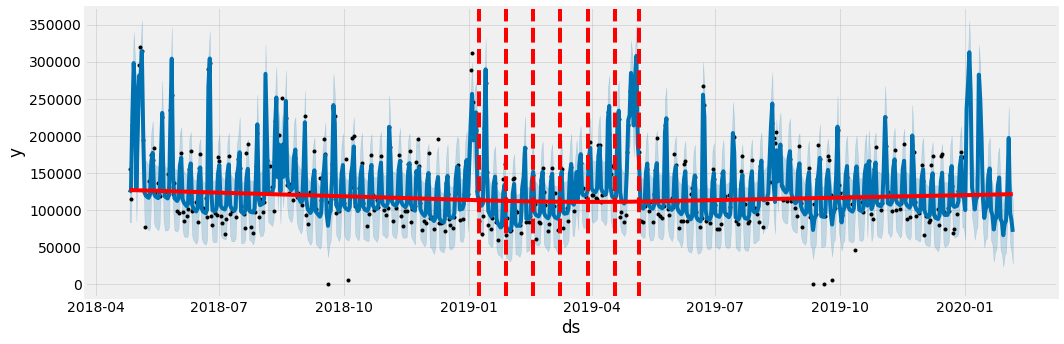

In [54]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast,figsize=(15, 5))
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [55]:
#forecast.to_csv('forecast1819J.csv')